In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [3]:
house = pd.read_csv('HousePriceExample.csv')

In [4]:
house


,Size,Rooms,Price,Unnamed: 3
0,100,2,137.556462,NaN
1,110,2,147.266947,NaN
2,210,3,277.823882,NaN
3,150,2,201.293308,NaN
4,170,3,228.432090,NaN
5,101,2,136.208504,NaN
6,120,2,160.248469,NaN
7,160,3,216.177111,NaN
8,180,3,241.515656,NaN
9,250,3,331.809213,NaN


In [5]:
house.drop('Unnamed: 3', axis = 1, inplace = True)

In [12]:
house

,Size,Rooms,Price
0,100,2,137.556462
1,110,2,147.266947
2,210,3,277.823882
3,150,2,201.293308
4,170,3,228.432090
5,101,2,136.208504
6,120,2,160.248469
7,160,3,216.177111
8,180,3,241.515656
9,250,3,331.809213


In [6]:
house.describe()

,Size,Rooms,Price
count,20.000000,20.000000,20.000000
mean,159.250000,2.350000,213.261857
std,42.077466,0.587143,55.163494
min,95.000000,1.000000,128.432274
25%,129.750000,2.000000,175.073851
50%,160.000000,2.000000,213.957543
75%,185.000000,3.000000,247.285431
max,250.000000,3.000000,331.809213


In [7]:
#import three models to compare
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
#import training and testing model
from sklearn.model_selection import train_test_split

In [8]:
modelLR= LinearRegression() #default hyperparameters
modelNN= MLPRegressor()
modelRF= RandomForestRegressor()

In [9]:
#splitting the dataset into input and output
#pandas.iloc[rows, columns]
X= house.iloc[:, 0:2]
Y = house.iloc[:, 2:3]
Y=np.array(Y)

In [10]:
Y

array([[137.5564624],
       [147.2669473],
       [277.8238816],
       [201.2933082],
       [228.4320898],
       [136.2085042],
       [160.2484695],
       [216.1771107],
       [241.5156558],
       [331.8092128],
       [264.5947585],
       [211.7379762],
       [201.2840695],
       [234.54804  ],
       [274.0853575],
       [128.4322742],
       [193.9693532],
       [222.6373959],
       [180.0156443],
       [275.600622 ]])

In [41]:
#Split the dataset into training and testing
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2)#YOU CAN INCLUDE RANDOM STATE

In [29]:
Xtrain

,Size,Rooms
2,210,3
14,205,3
4,170,3
17,165,3
7,160,3
1,110,2
13,175,2
0,100,2
19,206,3
18,133,2


In [42]:
Ytrain

array([[137.5564624],
       [180.0156443],
       [193.9693532],
       [275.600622 ],
       [274.0853575],
       [201.2840695],
       [211.7379762],
       [228.4320898],
       [160.2484695],
       [331.8092128],
       [264.5947585],
       [277.8238816],
       [136.2085042],
       [222.6373959],
       [128.4322742],
       [234.54804  ]])

In [43]:
#trainning the models
modelLR.fit(Xtrain, Ytrain)
modelNN.fit(Xtrain, Ytrain)
modelRF.fit(Xtrain, Ytrain)
#Improving needs to use hyper-parameters
#Cross-validation

C:\Users\AYT-BRAIN\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\AYT-BRAIN\AppData\Local\Temp\ipykernel_7644\1877719828.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelRF.fit(Xtrain, Ytrain)


RandomForestRegressor()

In [44]:
print(modelLR.score(Xtest, Ytest))
print(modelNN.score(Xtest, Ytest))
print(modelRF.score(Xtest, Ytest))

0.9990702252640634
0.9995885458185638
0.9643762694550025


In [45]:
#importing metrics to compare the accurancy of the three models
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

LRprediction = modelLR.predict(Xtest)
NNprediction = modelNN.predict(Xtest)
RFprediction = modelRF.predict(Xtest)


In [46]:
print(mean_squared_error(LRprediction, Ytest))
print(mean_squared_error(NNprediction, Ytest))
print(mean_squared_error(RFprediction, Ytest))


1.1059486874914262
0.4894166235478823
42.37372399681735


In [47]:
print(mean_absolute_error(LRprediction, Ytest))
print(mean_absolute_error(NNprediction, Ytest))
print(mean_absolute_error(RFprediction, Ytest))


0.8633047984635738
0.5933383614113055
4.817205560499993


In [48]:
print(r2_score(LRprediction, Ytest))
print(r2_score(NNprediction, Ytest))
print(r2_score(RFprediction, Ytest))


0.9990207000748849
0.9995792319074983
0.9642209678330129


In [49]:
#K-FOLD VALIDATION
print("MSE of LR K-fold cv:", -cross_val_score(modelLR, X, Y.ravel(),cv = 10,scoring="neg_mean_squared_error").mean())
print("MSE of NN K-fold cv:", -cross_val_score(modelNN, X, Y.ravel(),cv = 10,scoring="neg_mean_squared_error").mean())
print("MSE of RF K-fold cv:", -cross_val_score(modelRF, X, Y.ravel(),cv = 10,scoring="neg_mean_squared_error").mean())

MSE of LR K-fold cv: 1.6839569118914859
MSE of NN K-fold cv: 4.120002428074962
MSE of RF K-fold cv: 182.38069203739252


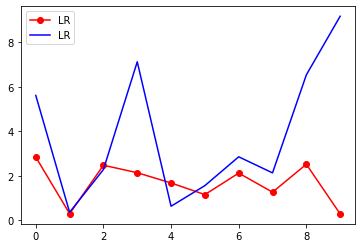

In [56]:
LRTT=[]
NNTT=[]
RFTT=[]

for i in range(10):
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y.ravel(), test_size = 0.2)
    
    modelLR.fit(Xtrain, Ytrain)
    modelNN.fit(Xtrain, Ytrain)
    modelRF.fit(Xtrain, Ytrain)
    
    LRpredi = modelLR.predict(Xtest)
    NNpredi = modelNN.predict(Xtest)
    RFpredi = modelRF.predict(Xtest)
    
    LRTT.append(mean_squared_error(LRpredi, Ytest))
    NNTT.append(mean_squared_error(NNpredi, Ytest))
    RFTT.append(mean_squared_error(RFpredi, Ytest))

    
plt.plot(LRTT, '-ro', label = 'LR')
plt.plot(NNTT, '-b', label = 'LR')
#plt.plot(RFTT, '-k+', label = 'LR')
plt.legend(loc="best")

In [58]:
cv = 10
LRCV=[]
NNCV=[]
RFCV = []

for i in range(10):
    LRCV.append(-cross_val_score(modelLR, X, Y.ravel(),cv = 10,scoring="neg_mean_squared_error").mean())
    NNCV.append(-cross_val_score(modelNN, X, Y.ravel(),cv = 10,scoring="neg_mean_squared_error").mean())
    RFCV.append(-cross_val_score(modelRF, X, Y.ravel(),cv = 10,scoring="neg_mean_squared_error").mean())
    
    


C:\Users\AYT-BRAIN\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\AYT-BRAIN\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\AYT-BRAIN\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\AYT-BRAIN\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\AYT-BRAIN\anaconda3\lib\site-packages\sklearn\n

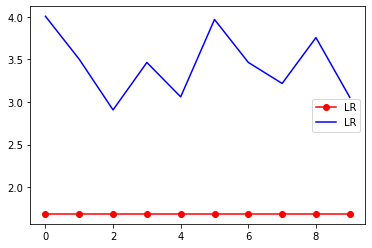

In [60]:
plt.plot(LRCV, '-ro', label = 'LR')
plt.plot(NNCV, '-b', label = 'LR')
#plt.plot(RFCV, '-k+', label = 'LR')
plt.legend(loc="best")